In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [9]:
sns.set()
%matplotlib inline

# One stain

In [10]:
# t - time cycle (5 days)
# N - total population
# S(t) - susceptible
# I(t) - infected
# R(t) - recovered
# D - number of days an infected person has and spreads the disease 
# beta - infection rate, expected number of people an infected person infects per time cycle
# gamma = 1/D - recovery rate, fraction of infected people that recover per time cycle
# R0 = beta / gamma - basic reproduction number
# beta = gamma * R0

In [11]:
def model_step(initial_conditions, t, population, beta, gamma):
    S, I, R = initial_conditions
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [12]:
start_day = '2021-01-09'
end_day = '2022-01-01'
days_in_cycle = 5
dates = pd.date_range(start=start_day,
                      end=end_day,
                      freq=f"{days_in_cycle}D")

t = np.array(range(len(dates)))
dates, t

(DatetimeIndex(['2021-01-09', '2021-01-14', '2021-01-19', '2021-01-24',
                '2021-01-29', '2021-02-03', '2021-02-08', '2021-02-13',
                '2021-02-18', '2021-02-23', '2021-02-28', '2021-03-05',
                '2021-03-10', '2021-03-15', '2021-03-20', '2021-03-25',
                '2021-03-30', '2021-04-04', '2021-04-09', '2021-04-14',
                '2021-04-19', '2021-04-24', '2021-04-29', '2021-05-04',
                '2021-05-09', '2021-05-14', '2021-05-19', '2021-05-24',
                '2021-05-29', '2021-06-03', '2021-06-08', '2021-06-13',
                '2021-06-18', '2021-06-23', '2021-06-28', '2021-07-03',
                '2021-07-08', '2021-07-13', '2021-07-18', '2021-07-23',
                '2021-07-28', '2021-08-02', '2021-08-07', '2021-08-12',
                '2021-08-17', '2021-08-22', '2021-08-27', '2021-09-01',
                '2021-09-06', '2021-09-11', '2021-09-16', '2021-09-21',
                '2021-09-26', '2021-10-01', '2021-10-06', '2021-

In [13]:
population = N = 144500000
beta = 1.23
D = 1
gamma = 1.0 / D

# Initial conditions
I0 = 563754
Rec0 = 27311290
S0 = population - I0 - Rec0
initial_conditions = (S0, I0, Rec0)
S0

116624956

In [14]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(model_step, initial_conditions, t, args=(population, beta, gamma))
S, I, R = ret.T

In [15]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

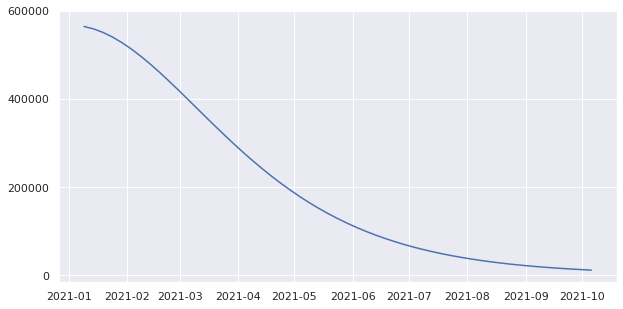

In [16]:
plt.figure(figsize=(10,5))
plt.plot(dates[:55], I[:55])
plt.yticks([0, 200_000, 400_000, 600_000])
#plt.xticks(dates[[10, 23, 35, 47]])
plt.show()

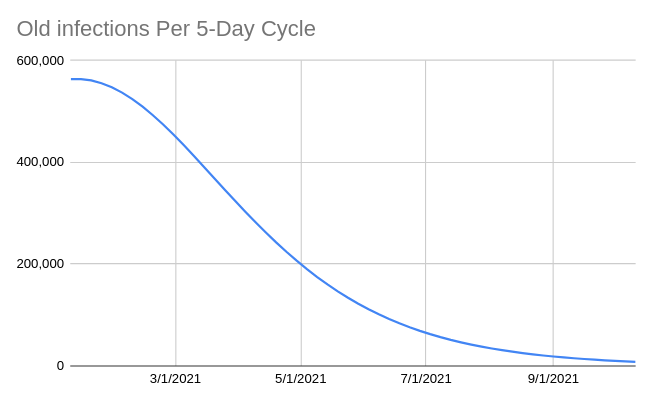

# Two stains

In [27]:
def model_step(initial_conditions, t, population, beta_s1, beta_s2, gamma):
    S, Is1, Is2, R = initial_conditions
    I = Is1 + Is2
    #dSdt = -beta_s1 * S * Is1 / population - beta_s2 * S * Is2 / population
    dSdt = -S/population * (beta_s1 * Is1 + beta_s2 * Is2 )
    
    dIs1dt = beta_s1 * S * Is1 / population - gamma * Is1
    dIs2dt = beta_s2 * S * Is2 / population - gamma * Is2
    
    dRdt = gamma * I
    return dSdt, dIs1dt, dIs2dt, dRdt

In [65]:
population = N = 144500000
beta_stain_1 = 1.23
beta_stain_2 = beta_stain_1 * 1.5
D = 1
gamma = 1.0 / D
print('R0 old stain:', beta_stain_1/gamma)
print('R0 new stain:', beta_stain_2/gamma)

# Initial conditions
initial_new_stain_rate = 0.00065 
I0 = 563754

I0s1 = (1-initial_new_stain_rate)*I0
I0s2 = (initial_new_stain_rate)*I0
Rec0 = 27311290
S0 = population - I0 - Rec0
initial_conditions = (S0, I0s1, I0s2, Rec0)
S0

R0 old stain: 1.23
R0 new stain: 1.845


116624956

In [66]:
ret = odeint(model_step, initial_conditions, t, args=(population, beta_stain_1, beta_stain_2, gamma))
S, Is1, Is2, R = ret.T

In [67]:
Is1[:10]

array([563387.5599    , 557978.08408346, 550030.16513383, 539699.21338098,
       527176.93428485, 512683.47107675, 496458.74394163, 478753.37116317,
       459819.5021114 , 439901.80677516])

In [68]:
Is2[:10]

array([  366.4401    ,   595.47710112,   960.87381864,  1539.79009131,
        2450.84408858,  3875.27297369,  6088.35986862,  9505.84173622,
       14752.0078504 , 22758.8815415 ])

In [69]:
Is2[1]

595.47710111832

In [70]:
S[1]

116068764.6873184

In [71]:
116,624,589.56

(116, 624, 589.56)

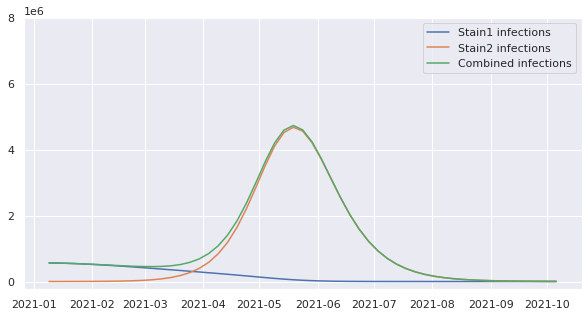

In [72]:
plt.figure(figsize=(10,5))
plt.plot(dates[:55], Is1[:55], label='Stain1 infections')
plt.plot(dates[:55], Is2[:55], label='Stain2 infections')
plt.plot(dates[:55], Is1[:55] + Is2[:55], label='Combined infections')
plt.yticks([0, 2e6, 4e6, 6e6, 8e6])
plt.legend()
plt.show()

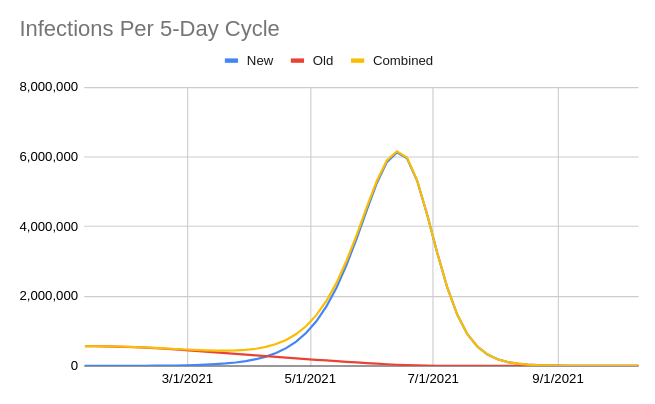

# Check on data

In [369]:
df = pd.read_csv('data/data.csv', sep=';')

In [370]:
df.columns = ['date', 'region', 'total_infected', 'total_recovered', 'total_dead', 'deaths per day', 'infected per day', 'recovered per day']
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df['infected'] = df['total_infected'] - df['total_recovered'] - df['total_dead']

In [371]:
df.head()

,date,region,total_infected,total_recovered,total_dead,deaths per day,infected per day,recovered per day,infected
0,2020-03-12,Адыгея,0,0,0,0,0,0,0
1,2020-03-12,Алтайский край,0,0,0,0,0,0,0
2,2020-03-12,Амурская обл.,0,0,0,0,0,0,0
3,2020-03-12,Архангельская обл.,0,0,0,0,0,0,0
4,2020-03-12,Астраханская обл.,0,0,0,0,0,0,0


In [372]:
df = df[df.region == 'Москва']

In [373]:
#df = df.groupby(['date']).sum().reset_index()

In [374]:
#df = df[df.region == 'Москва']
#df = df[['date', 'infected', 'recovered', 'dead']]

In [375]:
df['date']

40      2020-03-12
122     2020-03-13
204     2020-03-14
286     2020-03-15
368     2020-03-16
           ...    
25864   2021-01-10
25949   2021-01-11
26034   2021-01-12
26119   2021-01-13
26204   2021-01-14
Name: date, Length: 309, dtype: datetime64[ns]

In [376]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [377]:
df.head()

,date,region,total_infected,total_recovered,total_dead,deaths per day,infected per day,recovered per day,infected
40,2020-03-12,Москва,21,0,0,0,21,0,21
122,2020-03-13,Москва,26,0,0,0,5,0,26
204,2020-03-14,Москва,35,0,0,0,9,0,35
286,2020-03-15,Москва,35,1,0,0,0,1,34
368,2020-03-16,Москва,53,1,0,0,18,0,52


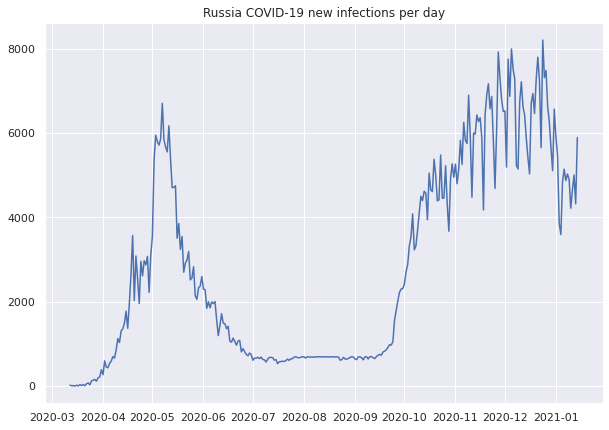

In [378]:
plt.figure(figsize=(10, 7))
plt.title('Moscow COVID-19 new infections per day')
plt.plot(df['date'], df['infected per day'])
plt.show()

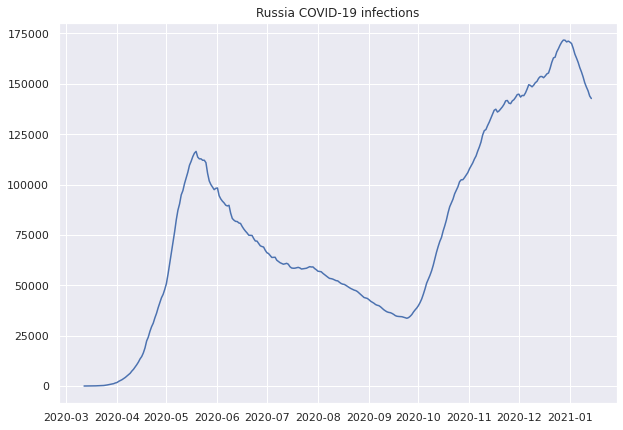

In [379]:
plt.figure(figsize=(10, 7))
plt.title('Moscow COVID-19 infections')
plt.plot(df['date'], df['infected'])
plt.show()

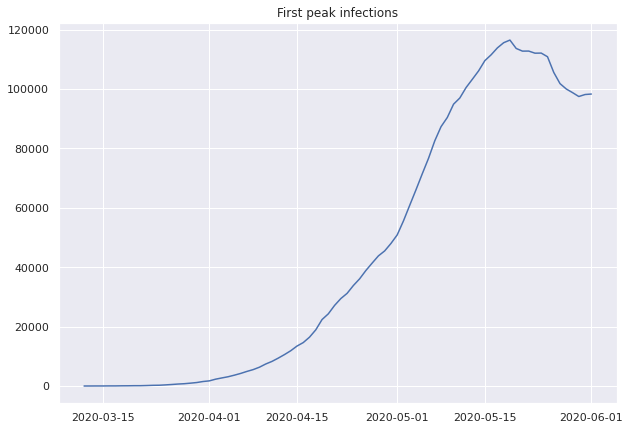

In [395]:
subset = df[df.date <= '2020-06-01']

plt.figure(figsize=(10, 7))
plt.title('First peak infections')
plt.plot(subset['date'], subset['infected'])
plt.show()

In [396]:
def apply_sir_to_subset(subset, beta=0.38, D=5, label=''):
    def model_step(initial_conditions, t, population, beta, gamma):
        S, I, R = initial_conditions
        dSdt = -beta * S * I / population
        dIdt = beta * S * I / population - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    
    start_day = subset.iloc[0].date
    end_day = subset.iloc[-1].date
    days_in_cycle = 1
    dates = pd.date_range(start=start_day,
                          end=end_day,
                          freq=f"{days_in_cycle}D")

    t = np.array(range(len(dates)))

    population = N = 144500000
    gamma = 1.0 / D

    # Initial conditions
    I0 = subset.iloc[0].infected
    Rec0 = subset.iloc[0].total_recovered
    S0 = population - I0 - Rec0
    initial_conditions = (S0, I0, Rec0)

    ret = odeint(model_step, initial_conditions, t, args=(population, beta, gamma))
    S, I, R = ret.T

    plt.figure(figsize=(10, 7))
    plt.title(label)
    plt.plot(subset['date'], subset['infected'], label='ground_truth')
    plt.plot(dates, I, label='predicted')
    plt.ylim(0, max(subset['infected'])+10000)
    plt.legend()
    plt.show()

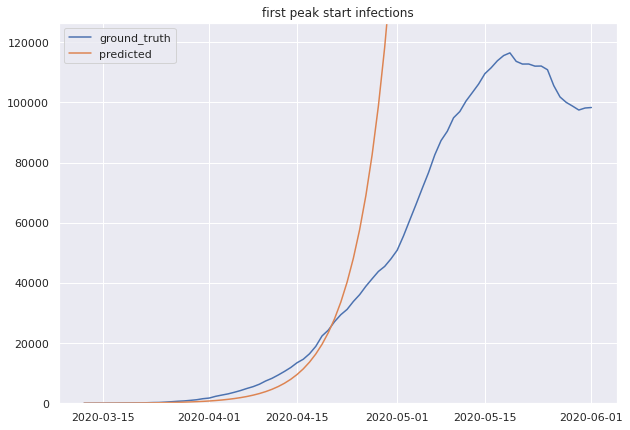

In [397]:
apply_sir_to_subset(subset, beta=0.38, label='first peak start infections')

In [398]:
subset.iloc[0]

date                 2020-03-12 00:00:00
region                            Москва
total_infected                        21
total_recovered                        0
total_dead                             0
deaths per day                         0
infected per day                      21
recovered per day                      0
infected                              21
Name: 40, dtype: object

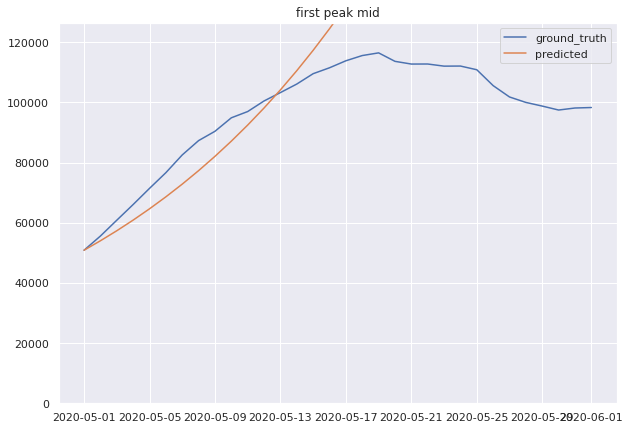

In [401]:
subset = df[(df.date >= '2020-05-01') & (df.date <= '2020-06-01')]

apply_sir_to_subset(subset, beta=0.26, label='first peak mid')

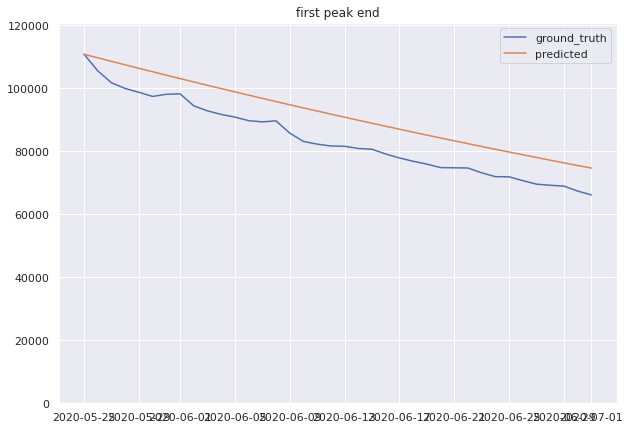

In [402]:
subset = df[(df.date >= '2020-05-25') & (df.date <= '2020-07-01')]

apply_sir_to_subset(subset, beta=0.19, label='first peak end')

In [403]:
beta_delta = 0.2/0.38
beta_delta

0.5263157894736842

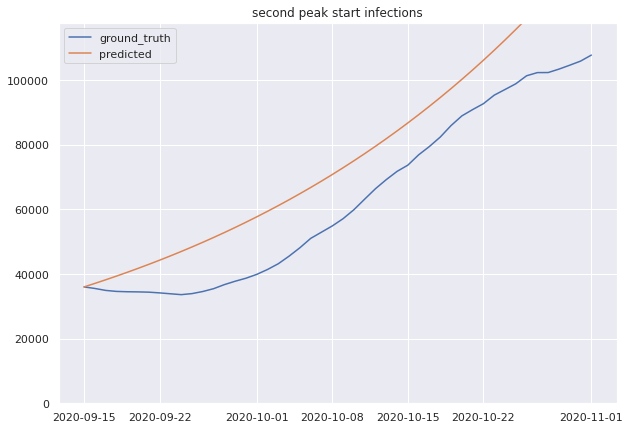

In [415]:
subset = df[(df.date >= '2020-09-15') & (df.date <= '2020-11-01')]

apply_sir_to_subset(subset, beta=0.23, label='second peak start infections')

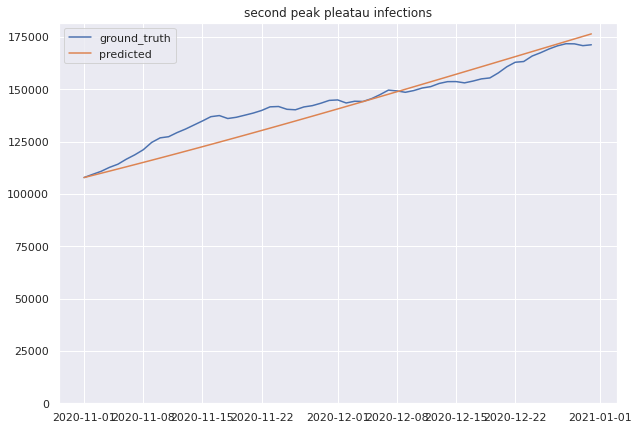

In [418]:
subset = df[(df.date >= '2020-11-01') & (df.date <= '2020-12-31')]

apply_sir_to_subset(subset, beta=0.21, label='second peak pleatau infections')